In [4]:
#importing necessary libraries
%pip install tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.datasets import fashion_mnist

  Using cached tensorflow-2.11.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp310-cp310-win_amd64.whl (266.3 MB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached termcolor-2.1.1-py3-none-any.whl (6.2 kB)
  Using cached h5py-3.7.0-cp310-cp310-win_amd64.whl (2.6 MB)
  Using cached grpcio-1.51.1-cp310-cp310-win_amd64.whl (3.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_io_gcs_filesystem-0.28.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached flatbuffers-22.11.23-py2.py3-none-any.whl (26 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached wrapt-1.14.1-cp310-cp310-win_amd64.whl (35 kB)
  Using cached tensorboard-2.11.

In [2]:
# Pre-requisite = python - 3.6 and tensorflow - 2.0 +

print(tensorflow.__version__)

2.9.2


In [3]:
# Loading the data

(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


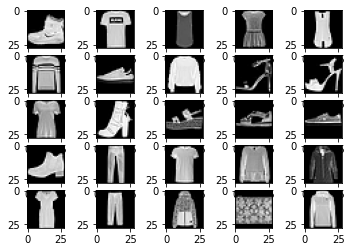

<Figure size 864x576 with 0 Axes>

In [4]:
# Visualizing the Dataset

for i in range(25):
    # define subplot
    plt.subplot(5, 5, i+1)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

# show the figure
plt.figure(figsize=(12,8))
plt.show()

In [5]:
# Normalizing the images

X_train = X_train/255
X_test = X_test/255

In [6]:
# Building the model

model = Sequential([
                  
    #flattening the images
    Flatten(input_shape=(28,28)),

    #adding first hidden layer
    Dense(256, activation='relu'),

    #adding second hidden layer
    Dense(128, activation='relu'),

    #adding third hidden layer
    Dense(64, activation='relu'),

    #adding output layer
    Dense(10, activation='softmax')
])

In [7]:
# Compiling the model

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#fitting the model

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4890 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3642 - accuracy: 0.8663
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3284 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3046 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2872 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2743 - accuracy: 0.8988
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2619 - accuracy: 0.9030
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2490 - accuracy: 0.9062
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2406 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.232

In [8]:
# Evaluating the model

model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3350 - accuracy: 0.8864


[0.3349672257900238, 0.8863999843597412]

In [9]:
'''
Now lets tune the following hyperparameter in model -

1. Number of hidden layers
2. Number of neurons in each hidden layers
3. Learning rate
4. Activation Function
'''


'\nNow lets tune the following hyperparameter in model -\n\n1. Number of hidden layers\n2. Number of neurons in each hidden layers\n3. Learning rate\n4. Activation Function\n'

In [10]:
# Use this command to install Keras tuner

! pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 44.1 MB/s 


In [11]:
# Installing the required libraries

from tensorflow import keras
from keras_tuner import RandomSearch

In [12]:
# Defining function to biuld the model

def build_model(hp):          # hp means hyper parameters
    model=Sequential()
    model.add(Flatten(input_shape = (28,28)))

    # Providing range for number of neurons in a hidden layer
    model.add(Dense(units = hp.Int('num_of_neurons', min_value = 32, max_value = 512, step = 32),
                                    activation ='relu'))
    
    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compiling the model
    model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate',values = [1e-2, 1e-3, 1e-4])),
                  loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

In [13]:
#feeding the model and parameters to Random Search

tuner = RandomSearch(build_model,
                    objective = 'val_accuracy',
                    max_trials = 5,
                    executions_per_trial = 3,
                    directory = 'tuner1',
                    project_name = 'Clothing')

# So this will run for (5*3)= 15 times with 10 epochs

In [14]:
# This tells us how many hyperparameter we are tuning
# in our case it's 2 = neurons, learning rate

tuner.search_space_summary()

Search space summary
Default search space size: 2
num_of_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [15]:
# Fitting the tuner on train dataset

tuner.search(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Trial 5 Complete [00h 03m 09s]
val_accuracy: 0.8535999854405721

Best val_accuracy So Far: 0.8853333195050558
Total elapsed time: 00h 17m 16s


In [16]:
# We can see the hyperparameters which is been selected by KerasTuner

tuner.results_summary()

Results summary
Results in tuner1/Clothing
Showing 10 best trials
Trial summary
Hyperparameters:
num_of_neurons: 160
learning_rate: 0.001
Score: 0.8853333195050558
Trial summary
Hyperparameters:
num_of_neurons: 416
learning_rate: 0.01
Score: 0.8545999924341837
Trial summary
Hyperparameters:
num_of_neurons: 128
learning_rate: 0.01
Score: 0.8535999854405721
Trial summary
Hyperparameters:
num_of_neurons: 320
learning_rate: 0.01
Score: 0.8535999854405721
Trial summary
Hyperparameters:
num_of_neurons: 96
learning_rate: 0.01
Score: 0.8533000151316324


In [17]:
'''
Now lets tune some more parameters - 

Now we will provide the range of the number of the layers to be 
used in the model which is between 2 to 20
'''

'\nNow lets tune some more parameters - \n\nNow we will provide the range of the number of the layers to be \nused in the model which is between 2 to 20\n'

In [18]:
def build_model(hp):                 # Hp means hyper parameters
    model=Sequential()
    model.add(Flatten(input_shape = (28,28)))

    # Providing the range for hidden layers  
    for i in range(hp.Int('num_of_layers', 2, 20)):         
        # Providing range for number of neurons in hidden layers
        model.add(Dense(units = hp.Int('num_of_neurons'+ str(i), min_value=32, max_value = 512, step = 32),
                                    activation = 'relu'))
        
    model.add(Dense(10, activation = 'softmax'))    # Output layer
    
    #  Compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),   #tuning learning rate
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
# Feeding the model and parameters to Random Search

tuner=RandomSearch(build_model,
                  objective = 'val_accuracy',
                  max_trials = 5,
                  executions_per_trial = 3,
                  directory = 'project',
                  project_name = 'Clothing')

In [20]:
# Tells us how many hyperparameters we are tuning
# in our case it's 3 = layers, neurons, learning rate

tuner.search_space_summary()

Search space summary
Default search space size: 4
num_of_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
num_of_neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
num_of_neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [21]:
# Fitting the tuner on train dataset

tuner.search(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Trial 5 Complete [00h 07m 09s]
val_accuracy: 0.878333330154419

Best val_accuracy So Far: 0.878333330154419
Total elapsed time: 00h 25m 29s


In [22]:
# We can see the hyperparameters which is been selected by KerasTuner

tuner.results_summary()

Results summary
Results in project/Clothing
Showing 10 best trials
Trial summary
Hyperparameters:
num_of_layers: 15
num_of_neurons0: 192
num_of_neurons1: 384
learning_rate: 0.0001
num_of_neurons2: 224
num_of_neurons3: 352
num_of_neurons4: 224
num_of_neurons5: 160
num_of_neurons6: 32
num_of_neurons7: 448
num_of_neurons8: 128
num_of_neurons9: 320
num_of_neurons10: 128
num_of_neurons11: 224
num_of_neurons12: 384
num_of_neurons13: 192
num_of_neurons14: 128
num_of_neurons15: 224
Score: 0.878333330154419
Trial summary
Hyperparameters:
num_of_layers: 13
num_of_neurons0: 224
num_of_neurons1: 288
learning_rate: 0.001
num_of_neurons2: 32
num_of_neurons3: 32
num_of_neurons4: 32
num_of_neurons5: 32
num_of_neurons6: 32
num_of_neurons7: 32
num_of_neurons8: 32
num_of_neurons9: 32
num_of_neurons10: 32
num_of_neurons11: 32
num_of_neurons12: 32
Score: 0.8779333432515463
Trial summary
Hyperparameters:
num_of_layers: 9
num_of_neurons0: 160
num_of_neurons1: 512
learning_rate: 0.001
num_of_neurons2: 416
num